# FASHION CLOTHES SELECTOR WITH TENSORFLOW AND KERAS

In this project, a classification of 29 different types of clothing is made..\
The dataset consists of 9392 images of the different clothing categories\
the model consist of a Convolutional Neural Network using Keras

## 1 - Importation of libraries

In [180]:
# Importation of libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import cv2
import random
import tensorflow as tf

In [181]:
# Importation of libraries modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## 2 - Importing the dataset

In [182]:
current_path = os.getcwd() #obtaining the current directory
path_file = '\Products'    #Going to the file that contains our images
data_dir = current_path + path_file #creating the file path

# Stablish the differents categories of clothes
labels = ['beanie','bikini','blazers','boatneck-tops','boat-shoes','bodysuit','boots','bowtie','bracelets','business-suits','cami-tops','chelsea-boots','coats','crop-tops','demin-jackets','earrings','evening-gowns','gloves','hoodies','pumps','scarf','skirts','sneakers','stilettos','sunglasses','trousers','tuxedos','waistcoat','wristwatch']

In [183]:
data = []       # empty list to be filled in with the images and labels data
IMG_SIZE = 80   # Set of image size, for normalize and reduce the computational cost

def create_data():
    """function that goes through the directory and imports the images from the dataset.
    
    """
    for category in labels:  # every of the 29 categories

        path = os.path.join(data_dir,category)  # create path 
        class_num = labels.index(category)  # get the classification  (0 to 29).

        for img in os.listdir(path):  # iterate over each image per file
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our data list
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_data()

print("size of the dataset: ", len(data))

size of the dataset:  9392


## 3 - Data preprocessing

First, We want to mix the data because now we have all category 1, then all category 2, etc. 

In [184]:
random.shuffle(data) # Mix the data

Now, we create our feature ann labels array

In [185]:
#Create X(features) and Y(labels) lists
X = []
y = []

# We put the information inside the lists
for features,label in data: 
    X.append(features)
    y.append(label)
    
# Transformation of lists in arrays
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3) # We reshape de array, number 3 is because is a RGB image
y = np.array(y)

We split the data in Train and Test set, we leave 20% of the data for the test set

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print('x train ', X_train.shape)
print('x test ', X_test.shape)
print('y train ', y_train.shape)
print('y test ', y_test.shape)

x train  (7513, 80, 80, 3)
x test  (1879, 80, 80, 3)
y train  (7513,)
y test  (1879,)


Now, we need to normalize the data before feeding it to the model so that the neural network will require less computational power for training. To do that we divide all the training image and the test images by 255 so it will be scaled to a range of 0 to 1

In [187]:
#Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [188]:
print(X_train.shape[1:])

(80, 80, 3)


We perform one hot encoding to the label sets

In [189]:
y_train_OH = to_categorical(y_train)
y_test_OH = to_categorical(y_test)

### 4 - Building the model

In [190]:
model1 = Sequential() #we define a sequential model

model1.add(Conv2D(10, (3, 3), input_shape = X.shape[1:] ,padding='same' ,activation = 'relu')) # First convolutional layer
model1.add(MaxPooling2D(pool_size=(2)))                                                        # We perform max pooling
model1.add(Dropout(0.25))                                                                      # We perform Dropout (to avoid overfitting)
model1.add(Conv2D(50, (3, 3),padding='same', activation='relu'))                               # We repeat the process
model1.add(MaxPooling2D(pool_size=(4)))
model1.add(Dropout(0.4))
model1.add(Flatten())                                                                          # We transforms the format of each picture to a one-dimensional array
model1.add(Dense(128,activation='relu'))                                                       # We add a dense layer
model1.add(Dense(29,activation='softmax'))                                                     # We finish our model with an output of 29 layers (because we have 29 categories)

optimizer= Adam(lr=0.001,beta_1=0.9,beta_2=0.999)                                              # We define the Adam optimizer
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])     # We compile the model

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 80, 80, 10)        280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 40, 10)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 40, 40, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 40, 40, 50)        4550      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 50)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 10, 10, 50)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5000)             

Fitting the model with:

- 12 epochs
- Validation split of 15% of the training set
- Batch_size of 50
- Early stopping (to avoid overfitting)


In [191]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(X_train, y_train_OH, epochs=12, validation_split=0.15, callbacks = [early_stopping_monitor], batch_size = 50)

Epoch 1/12
128/128 [==============================] - 41s 320ms/step - loss: 2.9483 - accuracy: 0.1729 - val_loss: 2.7458 - val_accuracy: 0.3097
Epoch 2/12
128/128 [==============================] - 36s 281ms/step - loss: 2.1948 - accuracy: 0.3772 - val_loss: 2.2658 - val_accuracy: 0.3869
Epoch 3/12
128/128 [==============================] - 31s 244ms/step - loss: 1.8141 - accuracy: 0.4828 - val_loss: 1.9992 - val_accuracy: 0.4800
Epoch 4/12
128/128 [==============================] - 30s 233ms/step - loss: 1.5525 - accuracy: 0.5537 - val_loss: 1.8424 - val_accuracy: 0.4898
Epoch 5/12
128/128 [==============================] - 30s 232ms/step - loss: 1.4031 - accuracy: 0.5868 - val_loss: 1.6316 - val_accuracy: 0.5652
Epoch 6/12
128/128 [==============================] - 31s 241ms/step - loss: 1.2635 - accuracy: 0.6243 - val_loss: 1.6623 - val_accuracy: 0.5599
Epoch 7/12
128/128 [==============================] - 37s 291ms/step - loss: 1.1639 - accuracy: 0.6467 - val_loss: 1.3882 - val_ac

### 5 - Evaluation of the model

In [192]:
# Obtain accuracy on test set
score = model1.evaluate(x=X_test, 
                       y=y_test_OH,
                       verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.684406578540802


Now, we will graphic the model accuracy vs the validation accuracy across the ephocs

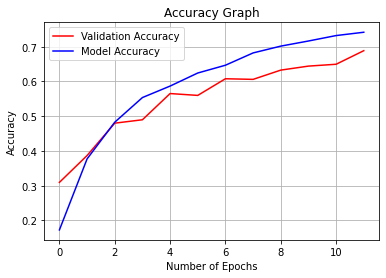

In [193]:
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.plot(history.history['accuracy'], color='b', label='Model Accuracy')
plt.title("Accuracy Graph")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

We can see that the accuracy of the model in the test set is 70% and if we take a look at the graphs, we can see that the accuracy of the validation is also close to that value.
We can also notice that in the last epochs, the validation accuracy does not improve, and we start to see how the model and the validation accuracy start to separate from each other. This may be due to the fact that the model, after this number of epochs, begins to overfit.

### 6 - Making predictions

In [194]:
y_pred = model1.predict(X_test)

Now, we crete 2 functions in order to visualize some of the predictions that our model has done

In [197]:
def plot_image(i, predictions_array, true_label, img):
  """Plot the image classified.
    
  Args:
  i (int): Index of the image.
  predictions_array (array): the predicted category of the image.
  true_label (array): The actual category of the image
  img (array): image data
    
  """
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  """makes a bar graph of the predictions, with the probabilities that that certain prediction has, of belonging to each of the categories
    
  Args:
  i (int): Index of the image.
  predictions_array (array): the predicted category of the image.
  true_label (array): The actual category of the image
    
  """
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(np.arange(0, 29, step=2))
  plt.yticks([])
  thisplot = plt.bar(range(29), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

we will plot the first 15 X test images, their predicted labels, and the true labels.
- Correct predictions in blue
- Incorrect predictions in red

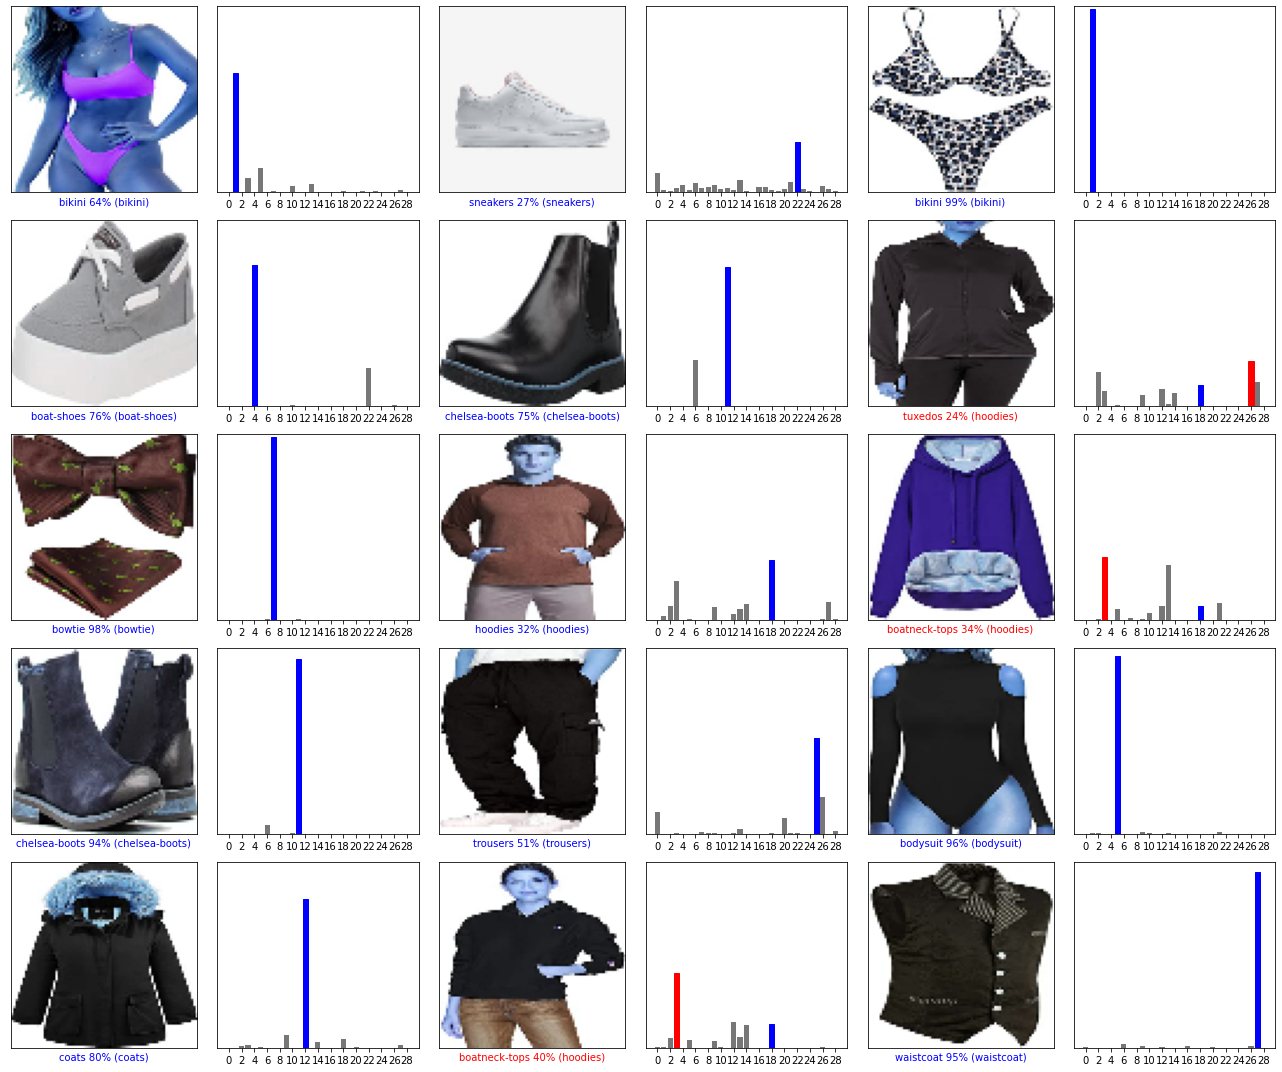

In [198]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred[i], y_test)
plt.tight_layout()
plt.show()

### 7 - Conclussions

It can be noted that the accuracy of the model is not optimal, in test sessions, different models have been shuffled, but an accuracy greater than that stated in this notebook has not been achieved. \
Probably, the main reason why the model does not predict with greater accuracy, is because there are many categories and our dataset is not that large, therefore, it cannot learn what is necessary for a more satisfactory classification. CNN requires the ability to learn features automatically from the data, which is generally only possible when lots of training data is available.


### 8 - possible model improvements

Next, some techniques that could be applied to improve the performance of the model will be cited.

- Increase the size of the dataset: Find a greater number of images to be able to train the model with more information
- Perform Image augmentation: This technique permits you to create artificially (synthetic) images from your existing images. It consists of operations like rotation, zooming, preprocessing function and so on.
- Perform transfer learning with a pre-trained model: Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.